In [1]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline  
import pandas as pd
import numpy
# Make sure TA-Lib AND the actual python library are BOTH installed on your computer
import talib
# Import Quandl Package
import quandl

# Get data from Quandl
stock = "XLY"
histPrice = quandl.get("YAHOO/"+stock) # Consumer Discretionary SP500 Sector ETF
histPrice['Date'] = histPrice.index.values
histPrice['Date'] = histPrice['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
histPrice = histPrice[['Date','Close','Open','High','Low','Volume']]

In [2]:
header = [histPrice]
header.append('SMA')
header.append('EMA')
header.append('KAMA')
header.append('ADX')
header.append('RSI')
header.append('CCI')
header.append('MACD')
header.append('MACDSIGNAL')
header.append('MACDHIST')    
header.append('MFI')
header.append('AD')
header.append('ADOSCILLATOR')
header.append('ATR')
header.append('OBV')
header.append('STOCH')
header.append('MOM')
header.append('ROC')
header.append('BOLLINGERUPPER')
header.append('BOLLINGERMIDDLE')
header.append('BOLLINGERLOWER')
header.append('HILBERTTRENDLINE')
header.append('WILLIAMR')

In [3]:
closeP = numpy.array(histPrice["Close"], dtype='f8')
highP = numpy.array(histPrice["High"], dtype='f8')
lowP = numpy.array(histPrice["Low"], dtype='f8')
volume = numpy.array(histPrice["Volume"], dtype='f8')    
            
sma = talib.SMA(closeP,timeperiod=14)
sma10 = talib.SMA(closeP,timeperiod=10)
sma5 = talib.SMA(closeP,timeperiod=5)
ema = talib.EMA(closeP,timeperiod=30)
kama = talib.KAMA(closeP,timeperiod=30)
adx = talib.ADX(highP,lowP,closeP,timeperiod=14)
rsi = talib.RSI(closeP,timeperiod=14)
cci = talib.CCI(highP,lowP,closeP,timeperiod=14)
macd, signal, hist = talib.MACD(closeP,fastperiod=12,slowperiod=26,signalperiod=9)
mfi = talib.MFI(highP,lowP,closeP,volume,timeperiod=14)
ad = talib.AD(highP,lowP,closeP,volume)
adOscillator = talib.ADOSC(highP,lowP,closeP,volume,fastperiod=3, slowperiod=10)
atr = talib.ATR(highP,lowP,closeP,timeperiod=14)
obv = talib.OBV(closeP,volume)
slowk, slowd = talib.STOCH(highP,lowP,closeP,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
mom = talib.MOM(closeP,timeperiod=10)
roc = talib.ROC(closeP,timeperiod=10)
upperBB, middleBB, lowerBB = talib.BBANDS(closeP, matype=3)
hilbertTL = talib.HT_TRENDLINE(closeP)
williamR = talib.WILLR(highP,lowP,closeP,timeperiod=14)
            
res = numpy.c_[histPrice,sma,ema,kama,adx,rsi,cci,macd,signal,hist,mfi,ad,adOscillator,atr,obv,slowk,slowd,mom,roc,upperBB,middleBB,lowerBB,hilbertTL,williamR,sma5,sma10]
            
records = res.tolist()

In [4]:
print("Done")

Done


In [5]:
# Test one of the technical indicators predictive power
Signal = sma10
#Signal = Series(sma5 > sma10) # Strategy for indicator when SMA 5 > SMA 10 = BUY, else SELL
#Signal[1:10] = float('NaN')
Signal[9:][sma5[9:] > sma10[9:]] = -1
Signal[9:][sma5[9:] <= sma10[9:]] = 1
#Signal = numpy.append(float('NaN'),adOscillator)[:-1].copy()
Signals = histPrice.copy().assign(signal=Signal, Return=histPrice["Close"].pct_change()[1:])
#Signals["signal"][sma50 < sma200]# = -1
Signals.dropna()

,Date,Close,Open,High,Low,Volume,Return,signal
Date,,,,,,,,
1999-01-06,1999-01-06,27.156250,26.718750,27.156250,26.718750,8100,0.028402,-1
1999-01-07,1999-01-07,27.125000,27.031250,27.312500,27.000000,13700,-0.001151,-1
1999-01-08,1999-01-08,27.156250,27.281250,27.406250,27.109381,18600,0.001152,-1
1999-01-11,1999-01-11,27.015619,27.250000,27.281250,26.796881,63100,-0.005179,-1
1999-01-12,1999-01-12,26.312500,26.609381,26.687500,26.281250,3300,-0.026026,-1
1999-01-13,1999-01-13,26.437500,25.687500,26.437500,25.687500,3400,0.004751,-1
1999-01-14,1999-01-14,25.843750,26.187500,26.312500,25.718750,36600,-0.022459,1
1999-01-15,1999-01-15,26.171881,26.187500,26.203119,26.046881,34800,0.012697,1
1999-01-19,1999-01-19,26.156250,26.468750,26.578119,26.156250,4100,-0.000597,1


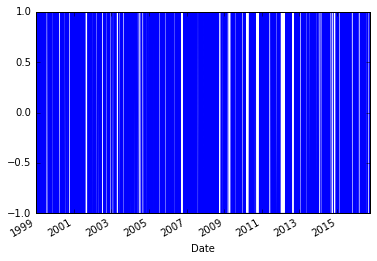

In [6]:
Signals["signal"].plot.line()

In [7]:
SignalsCleaned = Signals.copy().dropna()
# Import package for OLS function to be used
import statsmodels.formula.api as smf
# Define an Logistic Regression model on the returns
model = smf.OLS(numpy.array(SignalsCleaned["Return"][1:]), numpy.array(SignalsCleaned["signal"][:-1]))
fit = model.fit() # Fit the model
print(fit.summary()) # Print summary of the model

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.423
Date:                Tue, 11 Oct 2016   Prob (F-statistic):            0.00372
Time:                        15:30:53   Log-Likelihood:                 12610.
No. Observations:                4469   AIC:                        -2.522e+04
Df Residuals:                    4468   BIC:                        -2.521e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0006      0.000      2.902      0.0

In [8]:
Benchmark = pd.DataFrame(1+SignalsCleaned["Return"][1:]).cumprod()
#Strategy = (numpy.array(1+SignalsCleaned["Return"][1:]) * numpy.array(SignalsCleaned["signal"][:-1])).cumprod()
#numpy.array(1+SignalsCleaned["Return"][1:])
Strategy = (1+(numpy.array(SignalsCleaned["Return"][1:])*numpy.array(SignalsCleaned["signal"][:-1]))).cumprod()
Result = Benchmark.assign(Strategy=Strategy)
#Result = (pd.DataFrame(1+(numpy.array(SignalsCleaned["Return"][1:]))*numpy.array((SignalsCleaned["signal"][:-1]))).cumprod())
#Result.assign(Benchmark = (1+SignalsCleaned["Return"][1:]).cumprod())
Result

,Return,Strategy
Date,,
1999-01-07,0.998849,1.001151
1999-01-08,1.000000,0.999997
1999-01-11,0.994821,1.005176
1999-01-12,0.968930,1.031337
1999-01-13,0.973533,1.026438
1999-01-14,0.951669,1.049490
1999-01-15,0.963752,1.062815
1999-01-19,0.963176,1.062180
1999-01-20,0.979287,1.079947


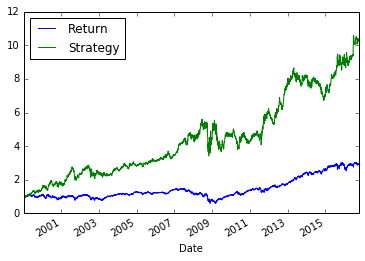

In [9]:
Result.plot.line()

In [10]:
import pyfolio as pf
import sys
import logbook
import numpy as np
from datetime import datetime
import pytz

from zipline.algorithm import TradingAlgorithm
from zipline.utils.factory import load_from_yahoo
from zipline.finance import commission

/Users/DakotaWixom/anaconda/lib/python3.5/site-packages/pandas/tseries/index.py:755: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning)
/Users/DakotaWixom/anaconda/lib/python3.5/site-packages/pandas/tseries/index.py:755: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning)
/Users/DakotaWixom/anaconda/lib/python3.5/site-packages/pandas/tseries/index.py:755: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning)


In [11]:
# Zipline trading algorithm
# Taken from zipline.examples.olmar
zipline_logging = logbook.NestedSetup([
    logbook.NullHandler(level=logbook.DEBUG),
    logbook.StreamHandler(sys.stdout, level=logbook.INFO),
    logbook.StreamHandler(sys.stderr, level=logbook.ERROR),
])
zipline_logging.push_application()

STOCKS = ['XLY']#, 'CERN', 'COST', 'DELL', 'GPS', 'INTC', 'MMM']


# On-Line Portfolio Moving Average Reversion

# More info can be found in the corresponding paper:
# http://icml.cc/2012/papers/168.pdf
def initialize(algo, eps=1, window_length=5):
    algo.stocks = STOCKS
    algo.sids = [algo.symbol(symbol) for symbol in algo.stocks]
    algo.m = len(algo.stocks)
    algo.price = {}
    algo.b_t = np.ones(algo.m) / algo.m
    algo.last_desired_port = np.ones(algo.m) / algo.m
    algo.eps = eps
    algo.init = True
    algo.days = 0
    algo.window_length = window_length

    algo.set_commission(commission.PerShare(cost=0))


def handle_data(algo, data):
    algo.days += 1
    if algo.days < algo.window_length:
        return

    if algo.init:
        rebalance_portfolio(algo, data, algo.b_t)
        algo.init = False
        return

    m = algo.m

    x_tilde = np.zeros(m)
    b = np.zeros(m)

    # find relative moving average price for each asset
    mavgs = data.history(algo.sids, 'price', algo.window_length, '1d').mean()
    for i, sid in enumerate(algo.sids):
        price = data.current(sid, "price")
        # Relative mean deviation
        x_tilde[i] = mavgs[sid] / price

    ###########################
    # Inside of OLMAR (algo 2)
    x_bar = x_tilde.mean()

    # market relative deviation
    mark_rel_dev = x_tilde - x_bar

    # Expected return with current portfolio
    exp_return = np.dot(algo.b_t, x_tilde)
    weight = algo.eps - exp_return
    variability = (np.linalg.norm(mark_rel_dev)) ** 2

    # test for divide-by-zero case
    if variability == 0.0:
        step_size = 0
    else:
        step_size = max(0, weight / variability)

    b = algo.b_t + step_size * mark_rel_dev
    b_norm = simplex_projection(b)
    np.testing.assert_almost_equal(b_norm.sum(), 1)

    rebalance_portfolio(algo, data, b_norm)

    # update portfolio
    algo.b_t = b_norm


def rebalance_portfolio(algo, data, desired_port):
    # rebalance portfolio
    desired_amount = np.zeros_like(desired_port)
    current_amount = np.zeros_like(desired_port)
    prices = np.zeros_like(desired_port)

    if algo.init:
        positions_value = algo.portfolio.starting_cash
    else:
        positions_value = algo.portfolio.positions_value + \
            algo.portfolio.cash

    for i, sid in enumerate(algo.sids):
        current_amount[i] = algo.portfolio.positions[sid].amount
        prices[i] = data.current(sid, "price")

    desired_amount = np.round(desired_port * positions_value / prices)

    algo.last_desired_port = desired_port
    diff_amount = desired_amount - current_amount

    for i, sid in enumerate(algo.sids):
        algo.order(sid, diff_amount[i])


def simplex_projection(v, b=1):
    """Projection vectors to the simplex domain
    Implemented according to the paper: Efficient projections onto the
    l1-ball for learning in high dimensions, John Duchi, et al. ICML 2008.
    Implementation Time: 2011 June 17 by Bin@libin AT pmail.ntu.edu.sg
    Optimization Problem: min_{w}\| w - v \|_{2}^{2}
    s.t. sum_{i=1}^{m}=z, w_{i}\geq 0
    Input: A vector v \in R^{m}, and a scalar z > 0 (default=1)
    Output: Projection vector w
    :Example:
    >>> proj = simplex_projection([.4 ,.3, -.4, .5])
    >>> print(proj)
    array([ 0.33333333, 0.23333333, 0. , 0.43333333])
    >>> print(proj.sum())
    1.0
    Original matlab implementation: John Duchi (jduchi@cs.berkeley.edu)
    Python-port: Copyright 2013 by Thomas Wiecki (thomas.wiecki@gmail.com).
    """

    v = np.asarray(v)
    p = len(v)

    # Sort v into u in descending order
    v = (v > 0) * v
    u = np.sort(v)[::-1]
    sv = np.cumsum(u)

    rho = np.where(u > (sv - b) / np.arange(1, p + 1))[0][-1]
    theta = np.max([0, (sv[rho] - b) / (rho + 1)])
    w = (v - theta)
    w[w < 0] = 0
    return w


start = datetime(2004, 1, 1, 0, 0, 0, 0, pytz.utc)
end = datetime(2016, 1, 1, 0, 0, 0, 0, pytz.utc)

# Load price data from yahoo.
data = load_from_yahoo(stocks=STOCKS, indexes={}, start=start, end=end)
data = data.dropna()

# Create and run the algorithm.
olmar = TradingAlgorithm(handle_data=handle_data, initialize=initialize)
results = olmar.run(data)
print("Done.")

[2016-10-11 19:31:06.274666] INFO: Loader: Loading stock: XLY
[2016-10-11 19:31:06.363893] WARNING: Loader: Refusing to download new treasury data because a download succeeded at 2016-10-11 19:29:45+00:00.


/Users/DakotaWixom/anaconda/lib/python3.5/site-packages/zipline/assets/asset_writer.py:192: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  row = group.sort('end_date').iloc[-1]
/Users/DakotaWixom/anaconda/lib/python3.5/site-packages/pandas/tseries/index.py:755: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning)


[2016-10-11 19:31:37.819448] INFO: Performance: Simulated 3021 trading days out of 3021.
[2016-10-11 19:31:37.820146] INFO: Performance: first open: 2004-01-02 14:31:00+00:00
[2016-10-11 19:31:37.820667] INFO: Performance: last close: 2015-12-31 21:00:00+00:00
Done.


In [13]:
pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions,
                          gross_lev=gross_lev, live_start_date='2009-10-22', round_trips=True)

NameError: name 'positions' is not defined

In [15]:
results

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2004-01-02 21:00:00,NaN,0.000000,NaN,-0.003094,NaN,NaN,0.000000,100000.000000,0.000000,0.000000,...,0,0,0,NaN,100000.000000,0.000000,0.000000,1,[],0.0438
2004-01-05 21:00:00,0.000000,0.000000,0.000000,0.009263,0.173865,0.000000,0.000000,100000.000000,0.000000,0.000000,...,0,0,0,NaN,100000.000000,0.000000,0.000000,2,[],0.0441
2004-01-06 21:00:00,0.000000,0.000000,0.000000,0.010567,0.126736,0.000000,0.000000,100000.000000,0.000000,0.000000,...,0,0,0,NaN,100000.000000,0.000000,0.000000,3,[],0.0429
2004-01-07 21:00:00,0.000000,0.000000,0.000000,0.012959,0.103892,0.000000,0.000000,100000.000000,0.000000,0.000000,...,0,0,0,NaN,100000.000000,0.000000,0.000000,4,[],0.0427
2004-01-08 21:00:00,0.000000,0.000000,0.000000,0.017987,0.090800,0.000000,0.000000,100000.000000,0.000000,0.000000,...,0,0,0,NaN,100000.000000,0.000000,0.000000,5,[],0.0427
2004-01-09 21:00:00,0.000065,-0.000010,-0.000571,0.008939,0.114583,0.000399,-99581.102500,418.897500,99580.102500,99580.102500,...,0,0,0,-6.480741,100000.000000,0.000000,0.000000,6,[{'order_id': 'b924490d48a342f5a1a674feb141d4d...,0.0411
2004-01-12 21:00:00,0.013319,-0.002231,-0.069010,0.013769,0.106436,-0.022757,-424.931536,-6.034036,99782.885286,99782.885286,...,0,0,0,-6.026948,418.897500,99580.102500,99580.102500,7,[{'order_id': 'a3224628054845918c8936311ab8811...,0.0411
2004-01-13 21:00:00,0.014246,-0.003818,-0.122056,0.008364,0.106732,0.006284,0.000000,-6.034036,99624.246302,99624.246302,...,0,0,0,-7.850970,-6.034036,99782.885286,99782.885286,8,[],0.0405
2004-01-14 21:00:00,0.046606,0.004114,0.043096,0.016728,0.106924,0.154990,0.000000,-6.034036,100417.429924,100417.429924,...,0,0,0,8.020512,-6.034036,99624.246302,99624.246302,9,[],0.0401
2004-01-15 21:00:00,0.045540,0.006969,0.106591,0.018104,0.100841,0.151867,0.000000,-6.034036,100702.979342,100702.979342,...,0,0,0,12.834557,-6.034036,100417.429924,100417.429924,10,[],0.0399


In [2]:
# Calculate a simple moving average of the close prices:
output = talib.SMA(close)

In [3]:
# Calculating bollinger bands, with triple exponential moving average:
from talib import MA_Type
upper, middle, lower = talib.BBANDS(close, matype=MA_Type.T3)

In [4]:
# Calculating momentum of the close prices, with a time period of 5:
output = talib.MOM(close, timeperiod=5)